In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv(r"C:\Users\fitoz\OneDrive\Desktop\Projects\Mall Customers\Mall_Customers.csv")

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


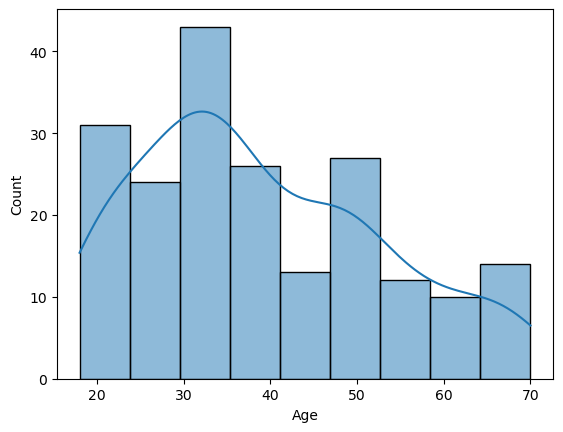

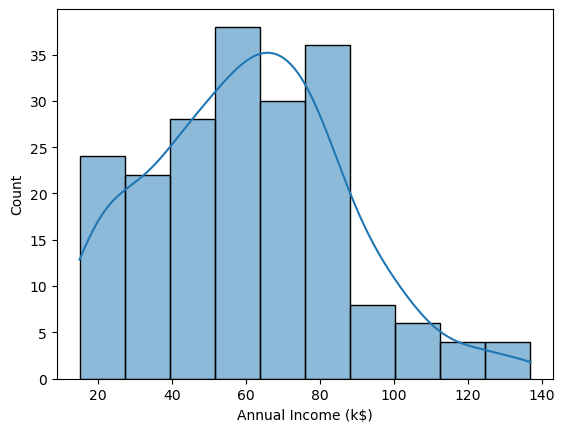

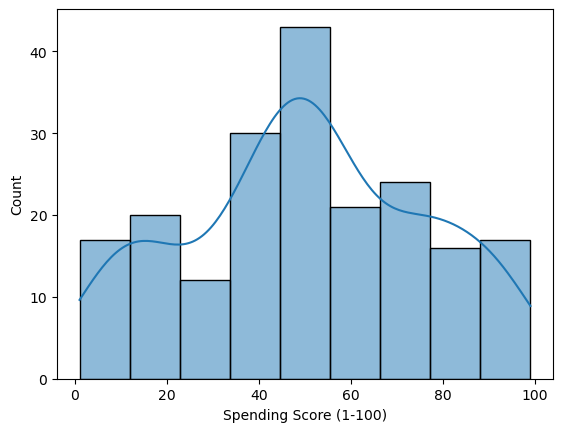

In [73]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.histplot(data=df,x=i,kde=True)
#Here we create simple histograms to see the distribution of the data

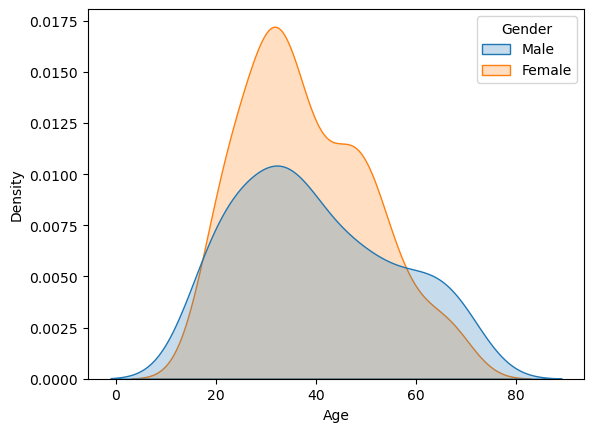

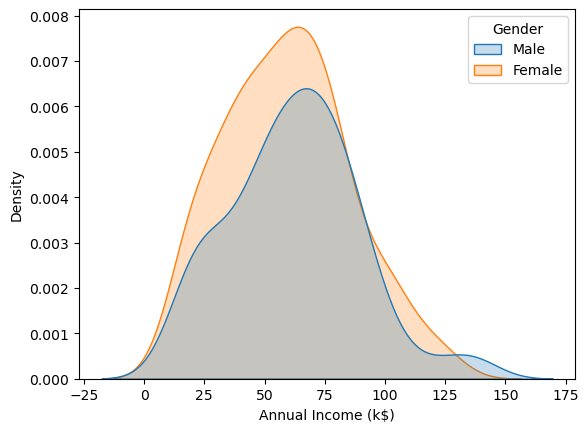

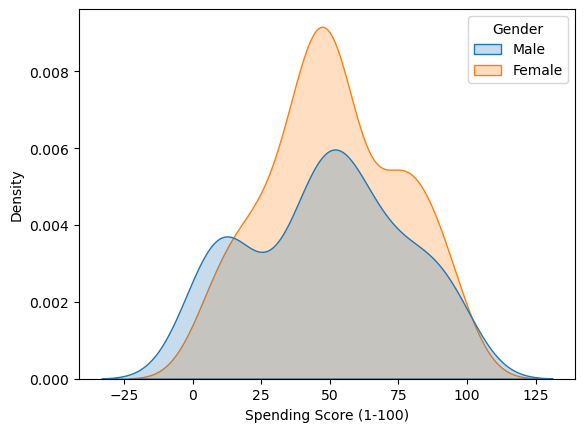

In [77]:
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i,fill=True,hue='Gender')
# We can also separate this metrics by gender


In [ ]:
#There also some outliers in annual income in the men's graph, meaning there is a larger group of men who spend between 125 and 150 in a year
#With that info we could search the proportion in gender of the people who spend more than 125k a year, maybe expensive products should be aimed at men?

In [99]:
df[df['Annual Income (k$)']>=125]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [101]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [ ]:
# Considering that the total proportion is os 56% female, 44% male, it's interesting that male represent a 75% of the highest annual income.
# If this were a larger data set this would be a valueble insight.

In [103]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

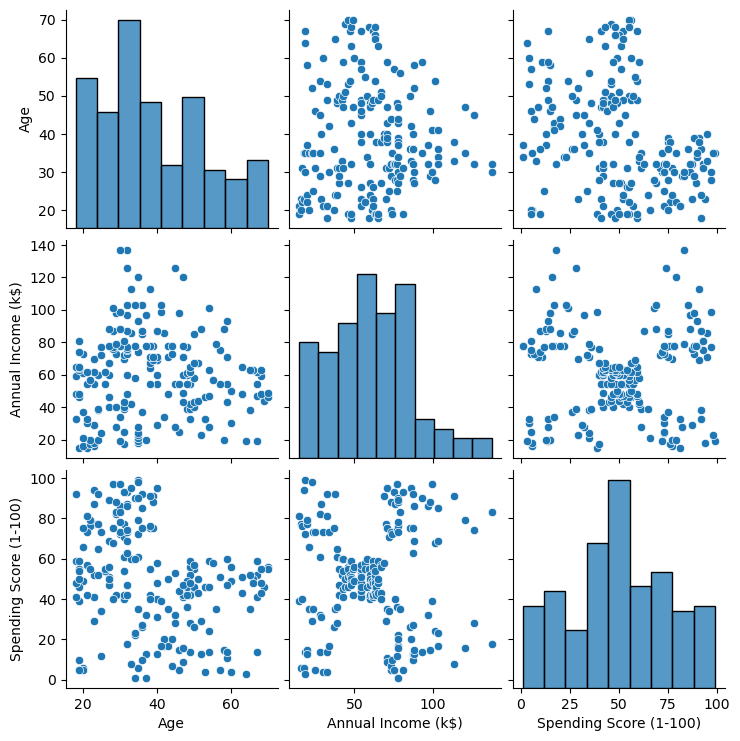

In [109]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(data=df)
#Here we have the relationship between different variables
#We can see clusters in Annual Income X Spending Score

In [113]:
df[columns].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [ ]:
# There is not much correlation between variables, one could say that older people have lower spending score

# Clustering

In [117]:
#Here we'll cluster by Annual Income and Spending Score.

In [121]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [141]:
#clustering with default number of cluster (8)
#We could scale the data but they are not so different in terms of scale
#import warnings
#warnings.filterwarnings('ignore')

clustering=KMeans()
clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Income and Score']=clustering.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income and Score
0,Male,19,15,39,7
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,7
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,5
197,Male,32,126,74,2
198,Male,32,137,18,5


# Elbow Method

In [152]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores

[269981.28,
 184609.98434090617,
 106348.37306211118,
 73880.64496247194,
 44454.47647967974,
 40825.16946386946,
 30273.394312070042,
 26415.467796738143,
 27899.59577292862,
 20631.199055471472]

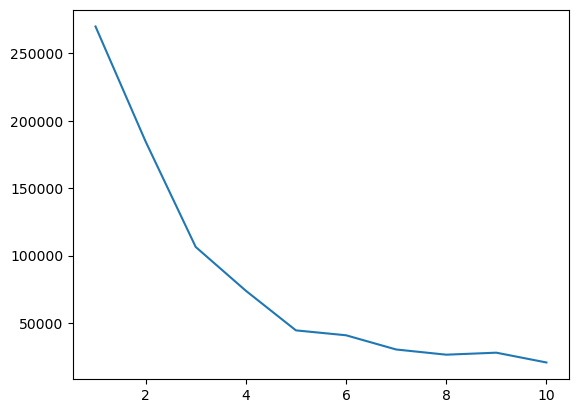

In [154]:
#Now we plot the inertia scores
plt.plot(range(1,11),inertia_scores)

In [158]:
#It looks like 3 or 5 could be a good amount of clusters. Following what I saw before, I would say 5 is better.
clustering=KMeans(n_clusters=5)
clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Income and Score']=clustering.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income and Score
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,0
197,Male,32,126,74,2
198,Male,32,137,18,0


In [186]:
#Let's see if the clusters represent what we saw in scatter plot early
centers=pd.DataFrame(clustering.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,26.304348,20.913043
4,25.727273,79.363636


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

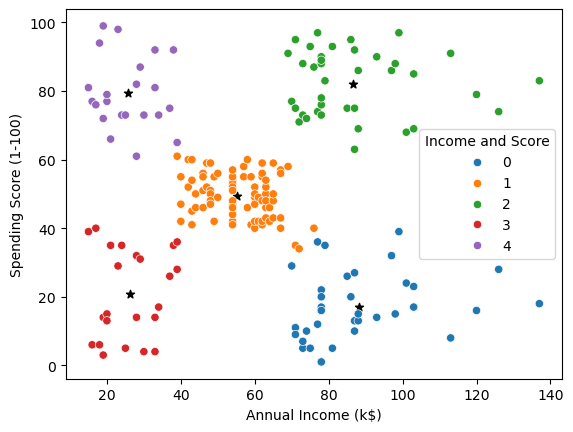

In [198]:
plt.scatter(x=centers['x'],y=centers['y'],c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income and Score',palette='tab10')

In [210]:
df.groupby('Income and Score').describe()
#We can see that most of the customers are in cluster 1 as expected.
#Cluster 0 and 2 should be the focus as they are the people who spend the most.

Age                                                        \
                 count       mean        std   min    25%   50%    75%   max   
Income and Score                                                               
0                 35.0  41.114286  11.341676  19.0  34.00  42.0  47.50  59.0   
1                 81.0  42.716049  16.447822  18.0  27.00  46.0  54.00  70.0   
2                 39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
3                 23.0  45.217391  13.228607  19.0  35.50  46.0  53.50  67.0   
4                 22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   

                 Annual Income (k$)             ...                \
                              count       mean  ...    75%    max   
Income and Score                                ...                 
0                              35.0  88.200000  ...  97.50  137.0   
1                              81.0  55.296296  ...  62.00   76.0   
2                              39.0  86.538462  ...  95.00  137.0   
3                              23.0  26.304348  ...  33.00   39.0   
4                              22.0  25.727273  ...  32.25   39.0   

                 Spending Score (1-100)                                    \
                                  count       mean        std   min   25%   
Income and Score                                                            
0                                  35.0  17.114286   9.952154   1.0  10.0   
1                                  81.0  49.518519   6.530909  34.0  44.0   
2                                  39.0  82.128205   9.364489  63.0  74.5   
3                                  23.0  20.913043  13.017167   3.0   9.5   
4                                  22.0  79.363636  10.504174  61.0  73.0   

                                     
                   50%    75%   max  
Income and Score                     
0                 16.0  23.50  39.0  
1                 50.0  55.00  61.0  
2                 83.0  90.00  97.0  
3                 17.0  33.50  40.0  
4                 77.0  85.75  99.0  

[5 rows x 24 columns]

In [212]:
df.groupby(['Income and Score','Gender']).describe()
#We see that there's not much difference between male and female on cluster 0 and cluster 2

Age                                                  \
                        count       mean        std   min    25%   50%    75%   
Income and Score Gender                                                         
0                Female  16.0  43.250000   9.161514  23.0  36.75  44.0  48.25   
                 Male    19.0  39.315789  12.867067  19.0  32.50  40.0  47.50   
1                Female  48.0  40.895833  14.746423  18.0  27.75  41.5  50.00   
                 Male    33.0  45.363636  18.567139  18.0  26.00  48.0  63.00   
2                Female  21.0  32.190476   3.076021  27.0  30.00  32.0  35.00   
                 Male    18.0  33.277778   4.389902  27.0  30.00  32.0  37.50   
3                Female  14.0  43.214286  11.682851  20.0  35.25  43.5  49.00   
                 Male     9.0  48.333333  15.540270  19.0  37.00  52.0  60.00   
4                Female  13.0  25.461538   5.221995  20.0  22.00  23.0  30.00   
                 Male     9.0  25.000000   5.612486  18.0  21.00  24.0  29.00   

                              Annual Income (k$)             ...          \
                          max              count       mean  ...     75%   
Income and Score Gender                                      ...           
0                Female  57.0               16.0  90.937500  ...  101.50   
                 Male    59.0               19.0  85.894737  ...   87.50   
1                Female  68.0               48.0  55.354167  ...   63.00   
                 Male    70.0               33.0  55.212121  ...   62.00   
2                Female  38.0               21.0  86.047619  ...   97.00   
                 Male    40.0               18.0  87.111111  ...   91.75   
3                Female  65.0               14.0  27.357143  ...   33.75   
                 Male    67.0                9.0  24.666667  ...   30.00   
4                Female  35.0               13.0  25.692308  ...   33.00   
                 Male    35.0                9.0  25.777778  ...   28.00   

                               Spending Score (1-100)                        \
                           max                  count       mean        std   
Income and Score Gender                                                       
0                Female  126.0                   16.0  22.062500   9.553141   
                 Male    137.0                   19.0  12.947368   8.422679   
1                Female   76.0                   48.0  49.000000   6.565545   
                 Male     71.0                   33.0  50.272727   6.506116   
2                Female  120.0                   21.0  81.666667   7.831560   
                 Male    137.0                   18.0  82.666667  11.103788   
3                Female   39.0                   14.0  21.714286  12.079408   
                 Male     39.0                    9.0  19.666667  15.033296   
4                Female   39.0                   13.0  80.538462  10.697472   
                 Male     38.0                    9.0  77.666667  10.606602   

                                                         
                          min    25%   50%    75%   max  
Income and Score Gender                                  
0                Female   5.0  16.00  22.5  28.25  39.0  
                 Male     1.0   8.50  12.0  16.00  36.0  
1                Female  34.0  42.75  49.5  54.25  61.0  
                 Male    35.0  46.00  51.0  55.00  60.0  
2                Female  69.0  75.00  83.0  88.00  95.0  
                 Male    63.0  74.25  85.5  91.75  97.0  
3                Female   5.0  14.00  21.5  31.75  40.0  
                 Male     3.0   4.00  14.0  35.00  39.0  
4                Female  65.0  73.00  77.0  87.00  99.0  
                 Male    61.0  73.00  79.0  82.00  92.0  

[10 rows x 24 columns]